In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Recovered image')

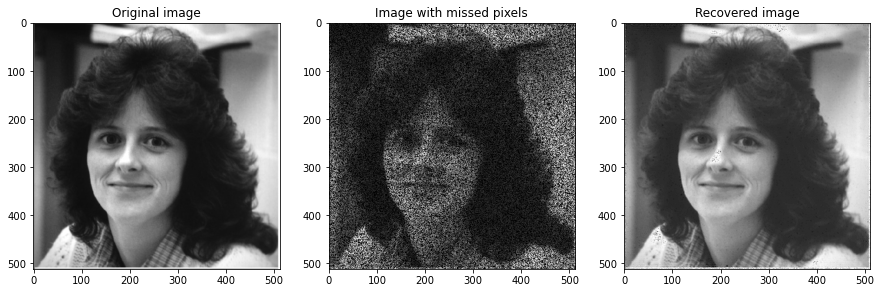

In [14]:
img_size = 512
treshold = 0.5
c0 = img_size//2

img = Image.open('img.jpg').convert('L')
img = img.resize((img_size, img_size))
img = np.array(img)

miss_index = np.random.uniform(size=(img_size ,img_size))
miss_index= np.where(miss_index>treshold)


miss_img = img.copy()
miss_img[miss_index] = 0

plt.figure(figsize=(15,5))
plt.subplot(1,3,1).imshow(img)
plt.title('Original image')
plt.subplot(1,3,2).imshow(miss_img)
plt.title('Image with missed pixels')
coefs = np.fft.fft2(miss_img)

rec_coefs = np.zeros_like(coefs)
rec_coefs[0,0] = coefs[0,0]
rec_coefs = np.fft.ifftshift(rec_coefs)
rec_img = np.abs(np.fft.ifft2(rec_coefs))
miss_img[miss_index] = rec_img[miss_index]


for i in range(1, img_size//4):
    coefs = np.fft.fft2(miss_img)
    coefs = np.fft.fftshift(coefs)
    rec_coefs = np.zeros_like(coefs)
    rec_coefs[c0-i:c0+i,c0-i:c0+i] = coefs[c0-i:c0+i,c0-i:c0+i]
    rec_coefs = np.fft.ifftshift(rec_coefs)
    rec_img = np.abs(np.fft.ifft2(rec_coefs))
    miss_img[miss_index] = rec_img[miss_index]
    
plt.subplot(1,3,3).imshow(miss_img)
plt.title('Recovered image')

Text(0.5, 1.0, 'Recovered image')

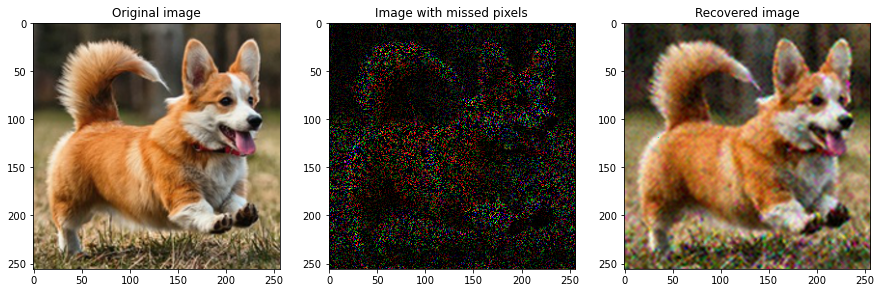

In [15]:
img_size = 256
treshold = 0.15
c0 = img_size//2

img = Image.open('test_rgb.jpg')
img = img.resize((img_size, img_size))
img = np.array(img)

miss_index = np.random.uniform(size=(img_size ,img_size,3))
miss_index = np.where(miss_index>treshold)


miss_img = img.copy()
miss_img[miss_index] = 0
miss_index= np.where(miss_img==0)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1).imshow(img)
plt.title('Original image')
plt.subplot(1,3,2).imshow(miss_img)
plt.title('Image with missed pixels')

coefs = np.fft.fft2(miss_img, axes=[0,1])
rec_coefs = np.zeros_like(coefs)
rec_coefs[0,0] = coefs[0,0]
rec_img = np.abs(np.fft.ifft2(rec_coefs, axes=[0,1]))
miss_img[miss_index] = rec_img[miss_index]


for i in range(1, img_size//4):
    coefs = np.fft.fft2(miss_img, axes=[0,1])
    coefs = np.fft.fftshift(coefs)
    rec_coefs = np.zeros_like(coefs)
    rec_coefs[c0-i:c0+i,c0-i:c0+i] = coefs[c0-i:c0+i,c0-i:c0+i]
    rec_coefs = np.fft.ifftshift(rec_coefs)
    rec_img = np.abs(np.fft.ifft2(rec_coefs, axes=[0,1]))
    miss_img[miss_index] = rec_img[miss_index]

plt.subplot(1,3,3).imshow(miss_img)
plt.title('Recovered image')

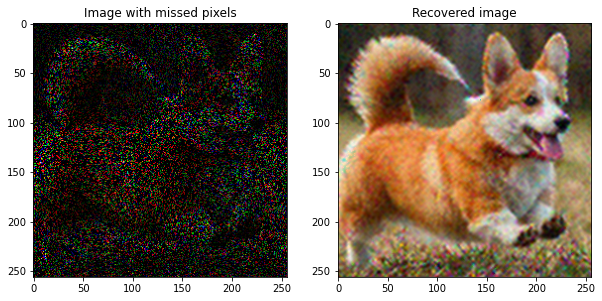

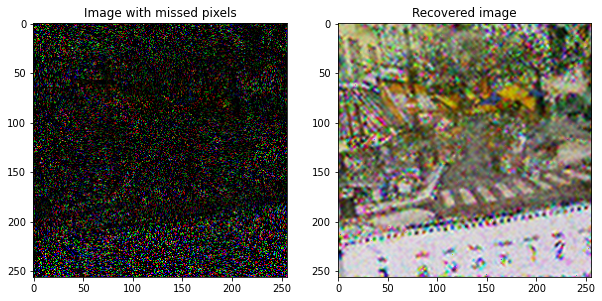

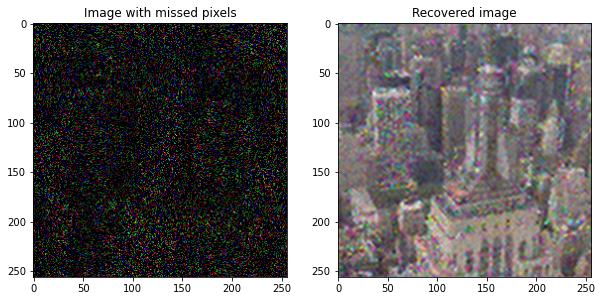

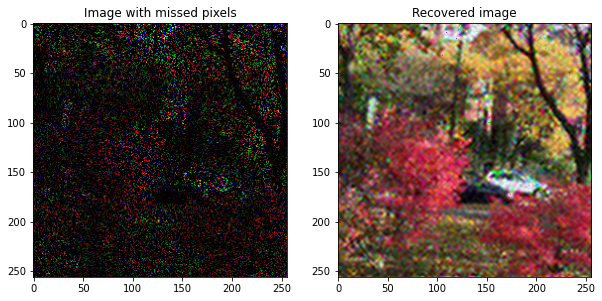

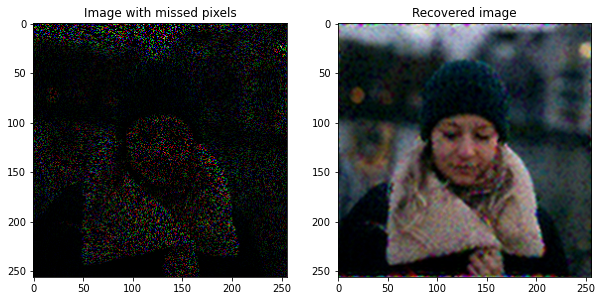

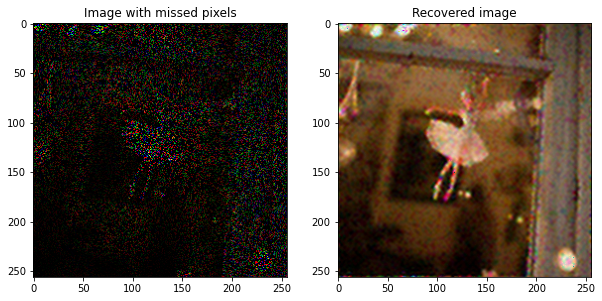

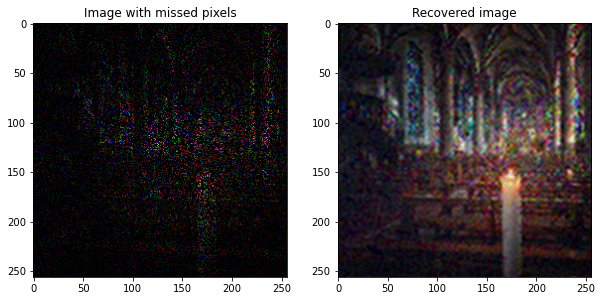

In [17]:
imgs = np.load('data.npy')
img_size = 256

for img in imgs:

    miss_index= np.where(img==0)
    miss_img = img.copy()
    #reconstruct with only zero frequency
    coefs = np.fft.fft2(miss_img, axes=[0,1])
    rec_coefs = np.zeros_like(coefs)
    rec_coefs[0,0] = coefs[0,0]
    rec_coefs = np.fft.ifftshift(rec_coefs)
    rec_img = np.abs(np.fft.ifft2(rec_coefs, axes=[0,1]))
    miss_img[miss_index] = rec_img[miss_index]
    #reconstruct with only 0-1, 0-2 ... frequences
    for i in range(1, img_size//4):
        coefs = np.fft.fft2(miss_img, axes=[0,1])
        coefs = np.fft.fftshift(coefs)
        rec_coefs = np.zeros_like(coefs)
        rec_coefs[c0-i:c0+i,c0-i:c0+i] = coefs[c0-i:c0+i,c0-i:c0+i]
        rec_coefs = np.fft.ifftshift(rec_coefs)
        rec_img = np.abs(np.fft.ifft2(rec_coefs, axes=[0,1]))
        miss_img[miss_index] = rec_img[miss_index]

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1).imshow(img)
    plt.title('Image with missed pixels')
    plt.subplot(1,2,2).imshow(miss_img)
    plt.title('Recovered image')